In [508]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
import pickle
import datetime as datetime

In [509]:
from config import db_password

In [510]:

#broker_df = pd.read_csv("../Resources/Clean_Data_12_8_22/Broker_Data_clean.csv")
#id_table_df = pd.read_csv("../Resources/Clean_Data_12_8_22/ID_table_clean.csv")
#lat_lng_df = pd.read_csv("../Resources/Clean_Data_12_8_22/lat_lng_clean.csv")
#mortgage_df = pd.read_csv("../Resources/Clean_Data_12_8_22/Mortgage_Data_clean.csv")
#property_char_df  = pd.read_csv("../Resources/Clean_Data_12_8_22/Prop_Charac_clean.csv")
public_rec_df = pd.read_csv("../Resources/Clean_Data_12_8_22/Pub_Rec_clean.csv")
#pub_remarks_df = pd.read_csv("../Resources/Clean_Data_12_8_22/Pub_Remarks_clean.csv")
#sales_data_df = pd.read_csv("../Resources/Clean_Data_12_8_22/Sales_Data_clean.csv")


In [511]:
# Name the SQL database your are accessing
database = "RealLeads"

In [512]:
# Make your local connection to the database in PostgreSQL
conn = psycopg2.connect(
    host="localhost",
    database=database,
    user="postgres",
    password=db_password)

In [513]:
# Table selection Function
def table_select(table_name):
    table =f"select * from \"{table_name}\""
    dataFrame = pd.read_sql(table, conn)
    return dataFrame

In [514]:
# Names of the tables to be imported
id_table_df = table_select("id_table")
broker_df = table_select("broker_data_clean")
lat_lng_df = table_select("lat_lng_clean")
mortgage_df = table_select("mortgage_data_clean")
property_char_df = table_select("prop_charac_clean")
#public_rec_df = table_select("pub_rec_clean")
sales_data_df = table_select("sales_data_clean")


# DISPLAYING ALL DATAFRAMES

In [515]:
broker_df.head(5)

,MLSNumber,Address,ListOfficeName,ListAgentName
0,DENC518086,2615 Pecksniff Rd,Patterson-Schwartz-Middletown,Dianne Platt
1,DENC518982,4938 S Tupelo Turn,"Long & Foster Real Estate, Inc.",Andrew White
2,DENC512992,15 Kristina Ct,"Long & Foster Real Estate, Inc.",Diane W Bacigalupi
3,DENC512104,3251 Champions Dr,"Long & Foster Real Estate, Inc.",Barbara Carpenter
4,DENC503480,3706 Lafayette St,Meyer & Meyer Realty,Peggy Cushing


In [516]:
id_table_df.head(5)

,MLSNumber,Address,Category,City,State,Zip_Code,County,MLSArea,Subdivision,School_District,Schools-Elementary,Schools-Middle,Schools-HighSchool
0,DENC518086,2615 Pecksniff Rd,RES,Wilmingon,DE,19808,NEWCASTLEDE,30903.0,SHERWOOD PARK II,Red Clay Consolidated,None,None,None
1,DENC518982,4938 S Tupelo Turn,RES,Wilmington,DE,19808,NEWCASTLEDE,30903.0,PEPPER RIDGE,Red Clay Consolidated,None,None,None
2,DENC512992,15 Kristina Ct,RES,Wilmington,DE,19808,NEWCASTLEDE,30903.0,WOODMILL,Red Clay Consolidated,None,None,None
3,DENC512104,3251 Champions Dr,RES,Wilmington,DE,19808,NEWCASTLEDE,30903.0,FAIRWAY FALLS,Red Clay Consolidated,None,None,None
4,DENC503480,3706 Lafayette St,RES,Wilmington,DE,19808,NEWCASTLEDE,30903.0,WASHINGTON HEIGHTS,Red Clay Consolidated,None,None,None


In [517]:
lat_lng_df.head(5)

,MLSNumber,address_new,lat,lng
0,DENC518086,"2615 Pecksniff Wilmington, DE",39.734608,-75.661402
1,DENC2018974,"2615 Pecksniff Wilmington, DE",39.734608,-75.661402
2,DENC518982,"4938 S Tupelo Wilmington, DE",39.744655,-75.548391
3,DENC512992,"15 Kristina Wilmington, DE",39.744655,-75.548391
4,DENC512104,"3251 Champions Wilmington, DE",39.729664,-75.698656


In [518]:
mortgage_df.head(5)

,Tax_ID,Address,Lender,Mort_Amt,Mort_Type,Mort_Int_Rate,Mort_Term,Mort_Record_Date,Mort_Due_Date,Mort_Date
0,06-004.00-004.C.010,108 N Landis Way Unit #108,AMERICAN NBRHD MTG ACCPTNC AMERICAN NBRHD MTG ...,388000.0,"Conv,HomeEquityLoan",0.0,15,3/16/22,4/1/37,3/11/22
1,06-004.00-004.C.014,140 N Landis Way N Unit #140,WSFS MTG WSFS MTG,420000.0,"Conv,HomeEquityLoan",0.0,30,8/24/21,9/1/51,8/17/21
2,06-004.00-004.C.021,216 S Landis Way S Unit #216,WSFS MTG,220000.0,Conv,0.0,30,11/15/16,12/1/46,11/10/16
3,06-004.00-004.C.033,339 Cassell Ct Unit #339,RBS CITIZENS NA,165000.0,"Conv,HomeEquityLoan",0.0,25,10/17/14,10/10/39,10/6/14
4,06-004.00-004.C.034,346 Cassell Ct Unit #346,TRIDENT MTG CO LP TRIDENT MTG CO LP,297500.0,Conv,0.0,15,1/7/21,1/1/36,12/8/20


In [519]:
property_char_df.head(5)

,MLSNumber,Address,BuildingName,Ownership,Senior_Community_YN,Condo/Coop_Assoc_YN,HOA_YN,AssociationFee,AssociationFeeFrequency,Structure_Type,...,Garage_YN,GarageSpaces,GarageFeatures,Parking,ExteriorFeatures,ExteriorMaterial,Main_Roof,Foundation,PorchDeck,SwimmingPoolType
0,DENC518086,2615 Pecksniff Rd,NONE AVAILABLE,FeeSimple,No,No,Yes,$15,Annually,Detached,...,Yes,1.0,None,None,"ExtensiveHardscape,Sidewalks,StoneRetainingWal...","BrickFront,VinylSiding",ArchitecturalShingle,None,"Patios,Porches",None
1,DENC518982,4938 S Tupelo Turn,None,FeeSimple,No,No,No,None,None,Interior Row/Townhouse,...,No,NaN,None,None,None,"AluminumSiding,Brick,VinylSiding",Asphalt,None,None,None
2,DENC512992,15 Kristina Ct,None,FeeSimple,No,No,No,None,None,Interior Row/Townhouse,...,No,NaN,None,None,None,VinylSiding,None,None,None,None
3,DENC512104,3251 Champions Dr,None,FeeSimple,No,No,Yes,$50,Annually,Interior Row/Townhouse,...,Yes,1.0,None,None,None,Other,Shingle,None,Patios,None
4,DENC503480,3706 Lafayette St,None,FeeSimple,No,No,No,None,None,Detached,...,No,NaN,None,None,None,Asbestos,None,None,None,None


In [520]:
public_rec_df.head(5)

,MLSNumber,Tax_ID,Address-truncated,PropertyCityState,Zip_Code,Zip4,CarrierRoute,PropDoNotMail,OwnerNames,OwnerLastName,...,BldgSqFtTotal,Stories,Bedrooms,Exterior,BsmtDesc,FireplaceTotal,GrgType,HeatDelivery,YearBuilt,YearRemod
0,DENC518086,08-038.30-119,2615 Pecksniff,"Wilmington, DE",19808,3026.0,C010,N,James Robinson,Robinson,...,1875.0,1.0,3.0,"Brick, Aluminum, Vinyl",Finished,0.0,Att/BuiltIn/Bsmt,Hot Water/Steam,1958.0,0.0
1,DENC518982,08-036.10-081,4938 S Tupelo,"Wilmington, DE",19808,1026.0,C009,N,Xiaopeng Deng,Deng,...,1575.0,2.0,3.0,"Brick, Aluminum, Vinyl",Finished,0.0,NaN,Hot/Warm Air,1976.0,0.0
2,DENC512992,08-044.30-363,15 Kristina,"Wilmington, DE",19808,4063.0,C084,N,Robert F Walls,Walls,...,NaN,2.0,2.0,"Aluminum, Vinyl",NaN,0.0,NaN,Heat Pump,1985.0,0.0
3,DENC512104,08-036.40-376,3251 Champions,"Wilmington, DE",19808,2601.0,C039,N,Michael J Downs,Downs,...,NaN,2.0,2.0,Other,NaN,1.0,Att/BuiltIn/Bsmt,Heat Pump,1985.0,0.0
4,DENC503480,07-041.10-071,3706 Lafayette,"Wilmington, DE",19808,6014.0,C001,N,Maria Corona,Corona,...,NaN,1.0,3.0,Asbestos,NaN,0.0,NaN,Hot/Warm Air,1957.0,0.0


In [521]:
sales_data_df.head(5)

,MLSNumber,Address,Status,Sold_Price,Sold_Price_less_Concession,Orig_List_Price,Current_List_Price,Days_on_Market,Previous_Days_on_Market,ListDate,StatusDate,Agreement_of_Sale_Date,SettledDate,Concessions_YN,Concessions_Remarks,SellerConcessionsAmount,FinalFinancing
0,DENC518086,2615 Pecksniff Rd,Closed,335000.0,335000.0,330000.0,330000.0,5.0,5.0,2020-12-11,2021-02-11,2020-12-16,2021-02-11,No,None,0.0,FHA
1,DENC518982,4938 S Tupelo Turn,Closed,200000.0,200000.0,215500.0,210000.0,47.0,67.0,2021-01-07,2021-04-08,2021-02-21,2021-04-08,No,None,0.0,Conventional
2,DENC512992,15 Kristina Ct,Closed,200000.0,200000.0,200000.0,200000.0,15.0,15.0,2020-12-28,2021-02-26,2021-01-09,2021-02-26,No,None,0.0,Conventional
3,DENC512104,3251 Champions Dr,Closed,200000.0,200000.0,219900.0,214900.0,11.0,11.0,2020-10-27,2020-12-14,2020-11-05,2020-12-11,No,None,0.0,Conventional
4,DENC503480,3706 Lafayette St,Closed,200000.0,200000.0,190000.0,190000.0,3.0,3.0,2020-06-20,2020-08-02,2020-06-21,2020-07-31,No,None,0.0,Conventional


# FIRST MERGE

### merge_df = sales_Data + id_table

In [522]:
merge_df = pd.merge(sales_data_df, id_table_df, on='MLSNumber')

In [523]:
merge_df

,MLSNumber,Address_x,Status,Sold_Price,Sold_Price_less_Concession,Orig_List_Price,Current_List_Price,Days_on_Market,Previous_Days_on_Market,ListDate,...,City,State,Zip_Code,County,MLSArea,Subdivision,School_District,Schools-Elementary,Schools-Middle,Schools-HighSchool
0,DENC518086,2615 Pecksniff Rd,Closed,335000.0,335000.0,330000.0,330000.0,5.0,5.0,2020-12-11,...,Wilmingon,DE,19808,NEWCASTLEDE,30903.0,SHERWOOD PARK II,Red Clay Consolidated,None,None,None
1,DENC518982,4938 S Tupelo Turn,Closed,200000.0,200000.0,215500.0,210000.0,47.0,67.0,2021-01-07,...,Wilmington,DE,19808,NEWCASTLEDE,30903.0,PEPPER RIDGE,Red Clay Consolidated,None,None,None
2,DENC512992,15 Kristina Ct,Closed,200000.0,200000.0,200000.0,200000.0,15.0,15.0,2020-12-28,...,Wilmington,DE,19808,NEWCASTLEDE,30903.0,WOODMILL,Red Clay Consolidated,None,None,None
3,DENC512104,3251 Champions Dr,Closed,200000.0,200000.0,219900.0,214900.0,11.0,11.0,2020-10-27,...,Wilmington,DE,19808,NEWCASTLEDE,30903.0,FAIRWAY FALLS,Red Clay Consolidated,None,None,None
4,DENC503480,3706 Lafayette St,Closed,200000.0,200000.0,190000.0,190000.0,3.0,3.0,2020-06-20,...,Wilmington,DE,19808,NEWCASTLEDE,30903.0,WASHINGTON HEIGHTS,Red Clay Consolidated,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5571,DENC520114,101 Meriden Dr,Closed,595000.0,595000.0,595000.0,595000.0,5.0,5.0,2021-06-24,...,Hockessin,DE,19707,NEWCASTLEDE,30902.0,CANTERBURY HILLS,Red Clay Consolidated,None,None,None
5572,DENC520392,417 Snuff Mill Hill Rd,Closed,595000.0,591262.0,639000.0,639000.0,25.0,25.0,2021-03-29,...,Hockessin,DE,19707,NEWCASTLEDE,30902.0,SNUFF MILL,Red Clay Consolidated,Brandywine Springs,Henry B. Du Pont,Alexis I. Dupont
5573,DENC2014038,400 Wilson Ct,Closed,600000.0,600000.0,529900.0,529900.0,7.0,7.0,2022-01-14,...,Hockessin,DE,19707,NEWCASTLEDE,30902.0,STENNING WOODS,Red Clay Consolidated,North Star,Henry B. Du Pont,Alexis I. Dupont
5574,DENC2005484,918 Old Public Rd,Closed,600000.0,598000.0,620000.0,620000.0,25.0,25.0,2021-08-26,...,Hockessin,DE,19707,NEWCASTLEDE,30902.0,QUAKER LEA EAST,Red Clay Consolidated,None,None,None


## Beginning first stage cleaning 

In [524]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5576 entries, 0 to 5575
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MLSNumber                   5576 non-null   object 
 1   Address_x                   5576 non-null   object 
 2   Status                      5576 non-null   object 
 3   Sold_Price                  5576 non-null   float64
 4   Sold_Price_less_Concession  5576 non-null   float64
 5   Orig_List_Price             5576 non-null   float64
 6   Current_List_Price          5576 non-null   float64
 7   Days_on_Market              5576 non-null   float64
 8   Previous_Days_on_Market     5576 non-null   float64
 9   ListDate                    5576 non-null   object 
 10  StatusDate                  5576 non-null   object 
 11  Agreement_of_Sale_Date      5576 non-null   object 
 12  SettledDate                 5576 non-null   object 
 13  Concessions_YN              5576 

In [525]:
merge_df["Zip_Code"] = merge_df["Zip_Code"].astype(str)

In [526]:
merge_df["Subdivision"]

0         SHERWOOD PARK II
1             PEPPER RIDGE
2                 WOODMILL
3            FAIRWAY FALLS
4       WASHINGTON HEIGHTS
               ...        
5571      CANTERBURY HILLS
5572            SNUFF MILL
5573        STENNING WOODS
5574       QUAKER LEA EAST
5575         ADARE VILLAGE
Name: Subdivision, Length: 5576, dtype: object

In [527]:
merge_df = merge_df.drop(merge_df.columns[1:4],axis=1)
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5576 entries, 0 to 5575
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MLSNumber                   5576 non-null   object 
 1   Sold_Price_less_Concession  5576 non-null   float64
 2   Orig_List_Price             5576 non-null   float64
 3   Current_List_Price          5576 non-null   float64
 4   Days_on_Market              5576 non-null   float64
 5   Previous_Days_on_Market     5576 non-null   float64
 6   ListDate                    5576 non-null   object 
 7   StatusDate                  5576 non-null   object 
 8   Agreement_of_Sale_Date      5576 non-null   object 
 9   SettledDate                 5576 non-null   object 
 10  Concessions_YN              5576 non-null   object 
 11  Concessions_Remarks         339 non-null    object 
 12  SellerConcessionsAmount     5576 non-null   float64
 13  FinalFinancing              5576 

In [528]:
merge_df = merge_df.drop(merge_df.columns[[1,3]],axis=1)
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5576 entries, 0 to 5575
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MLSNumber                5576 non-null   object 
 1   Orig_List_Price          5576 non-null   float64
 2   Days_on_Market           5576 non-null   float64
 3   Previous_Days_on_Market  5576 non-null   float64
 4   ListDate                 5576 non-null   object 
 5   StatusDate               5576 non-null   object 
 6   Agreement_of_Sale_Date   5576 non-null   object 
 7   SettledDate              5576 non-null   object 
 8   Concessions_YN           5576 non-null   object 
 9   Concessions_Remarks      339 non-null    object 
 10  SellerConcessionsAmount  5576 non-null   float64
 11  FinalFinancing           5576 non-null   object 
 12  Address_y                5576 non-null   object 
 13  Category                 5576 non-null   object 
 14  City                    

In [529]:
merge_df = merge_df.drop(merge_df.columns[2:16],axis=1)
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5576 entries, 0 to 5575
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MLSNumber           5576 non-null   object 
 1   Orig_List_Price     5576 non-null   float64
 2   Zip_Code            5576 non-null   object 
 3   County              5576 non-null   object 
 4   MLSArea             5576 non-null   object 
 5   Subdivision         5576 non-null   object 
 6   School_District     5576 non-null   object 
 7   Schools-Elementary  1373 non-null   object 
 8   Schools-Middle      1356 non-null   object 
 9   Schools-HighSchool  1485 non-null   object 
dtypes: float64(1), object(9)
memory usage: 479.2+ KB


In [530]:
merge_df = merge_df.drop(merge_df.columns[[3,4,7,8,9]],axis=1)
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5576 entries, 0 to 5575
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MLSNumber        5576 non-null   object 
 1   Orig_List_Price  5576 non-null   float64
 2   Zip_Code         5576 non-null   object 
 3   Subdivision      5576 non-null   object 
 4   School_District  5576 non-null   object 
dtypes: float64(1), object(4)
memory usage: 261.4+ KB


## Beginning Second Merge

### merge_df_stage_2 = merge_df + property_char_df

In [531]:
merge_df_stage_2 = pd.merge(merge_df, property_char_df , on='MLSNumber')

In [532]:
merge_df_stage_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5576 entries, 0 to 5575
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MLSNumber                  5576 non-null   object 
 1   Orig_List_Price            5576 non-null   float64
 2   Zip_Code                   5576 non-null   object 
 3   Subdivision                5576 non-null   object 
 4   School_District            5576 non-null   object 
 5   Address                    5576 non-null   object 
 6   BuildingName               1139 non-null   object 
 7   Ownership                  5576 non-null   object 
 8   Senior_Community_YN        5576 non-null   object 
 9   Condo/Coop_Assoc_YN        5576 non-null   object 
 10  HOA_YN                     5576 non-null   object 
 11  AssociationFee             1582 non-null   object 
 12  AssociationFeeFrequency    1582 non-null   object 
 13  Structure_Type             5576 non-null   objec

In [533]:
merge_df_stage_2["BasementType"].sample(10)

1848                   OutsideEntrance
3798                              Full
1628                              Full
2783    Full,InteriorAccess,Unfinished
1066                           Partial
1069             Partial,WalkoutStairs
2176                        Unfinished
2989                           Partial
3239                              None
80                                None
Name: BasementType, dtype: object

In [534]:
merge_df_stage_2 = merge_df_stage_2.drop(merge_df_stage_2.columns[[8,9,11,12,16,17,20,23,27,31,32,33,39,42,44,45,46,47,49,50,51,52,54,55,56,57,59,60,61,62]],axis=1)
merge_df_stage_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5576 entries, 0 to 5575
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLSNumber         5576 non-null   object 
 1   Orig_List_Price   5576 non-null   float64
 2   Zip_Code          5576 non-null   object 
 3   Subdivision       5576 non-null   object 
 4   School_District   5576 non-null   object 
 5   Address           5576 non-null   object 
 6   BuildingName      1139 non-null   object 
 7   Ownership         5576 non-null   object 
 8   HOA_YN            5576 non-null   object 
 9   Structure_Type    5576 non-null   object 
 10  Acres             5354 non-null   float64
 11  LotDimensions     4847 non-null   object 
 12  Age               5576 non-null   float64
 13  InteriorSqFt      5576 non-null   float64
 14  AboveGradeSqFt    5576 non-null   float64
 15  BelowGradeSqFt    5394 non-null   float64
 16  Bedrooms          5571 non-null   float64


In [535]:
merge_df_stage_2 = merge_df_stage_2.drop(merge_df_stage_2.columns[[6]],axis=1)

In [536]:
merge_df_stage_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5576 entries, 0 to 5575
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLSNumber         5576 non-null   object 
 1   Orig_List_Price   5576 non-null   float64
 2   Zip_Code          5576 non-null   object 
 3   Subdivision       5576 non-null   object 
 4   School_District   5576 non-null   object 
 5   Address           5576 non-null   object 
 6   Ownership         5576 non-null   object 
 7   HOA_YN            5576 non-null   object 
 8   Structure_Type    5576 non-null   object 
 9   Acres             5354 non-null   float64
 10  LotDimensions     4847 non-null   object 
 11  Age               5576 non-null   float64
 12  InteriorSqFt      5576 non-null   float64
 13  AboveGradeSqFt    5576 non-null   float64
 14  BelowGradeSqFt    5394 non-null   float64
 15  Bedrooms          5571 non-null   float64
 16  Baths             5571 non-null   float64


#### Dropping LotDimensions , FireplaceCount. Will add again if needed if it provides signicant contribution to ml model


In [537]:
merge_df_stage_2 = merge_df_stage_2.drop(merge_df_stage_2.columns[[10,28]],axis=1)
merge_df_stage_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5576 entries, 0 to 5575
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLSNumber         5576 non-null   object 
 1   Orig_List_Price   5576 non-null   float64
 2   Zip_Code          5576 non-null   object 
 3   Subdivision       5576 non-null   object 
 4   School_District   5576 non-null   object 
 5   Address           5576 non-null   object 
 6   Ownership         5576 non-null   object 
 7   HOA_YN            5576 non-null   object 
 8   Structure_Type    5576 non-null   object 
 9   Acres             5354 non-null   float64
 10  Age               5576 non-null   float64
 11  InteriorSqFt      5576 non-null   float64
 12  AboveGradeSqFt    5576 non-null   float64
 13  BelowGradeSqFt    5394 non-null   float64
 14  Bedrooms          5571 non-null   float64
 15  Baths             5571 non-null   float64
 16  BathsFull         5571 non-null   float64


In [538]:
merge_df_stage_2 = merge_df_stage_2.dropna()
merge_df_stage_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4944 entries, 0 to 5575
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLSNumber         4944 non-null   object 
 1   Orig_List_Price   4944 non-null   float64
 2   Zip_Code          4944 non-null   object 
 3   Subdivision       4944 non-null   object 
 4   School_District   4944 non-null   object 
 5   Address           4944 non-null   object 
 6   Ownership         4944 non-null   object 
 7   HOA_YN            4944 non-null   object 
 8   Structure_Type    4944 non-null   object 
 9   Acres             4944 non-null   float64
 10  Age               4944 non-null   float64
 11  InteriorSqFt      4944 non-null   float64
 12  AboveGradeSqFt    4944 non-null   float64
 13  BelowGradeSqFt    4944 non-null   float64
 14  Bedrooms          4944 non-null   float64
 15  Baths             4944 non-null   float64
 16  BathsFull         4944 non-null   float64


## Beginning third Merge

### merge_df_stage_3 = merge_df_stage_2 + public_rec_df

In [539]:
merge_df_stage_3 = pd.merge(merge_df_stage_2,public_rec_df,on='MLSNumber')

In [540]:
merge_df_stage_3.sample(5)

,MLSNumber,Orig_List_Price,Zip_Code_x,Subdivision,School_District,Address,Ownership,HOA_YN,Structure_Type,Acres,...,BldgSqFtTotal,Stories,Bedrooms_y,Exterior,BsmtDesc,FireplaceTotal,GrgType,HeatDelivery_y,YearBuilt,YearRemod
4737,DENC521768,418000.0,19707,TRAD AT PIKE CREEK,Red Clay Consolidated,1328 Madison Ln,FeeSimple,Yes,End of Row/Townhouse,0.05,...,2375.0,2.0,3.0,"Stone, Aluminum, Vinyl",NaN,0.0,Att/BuiltIn/Bsmt,Hot/Warm Air,2014.0,0.0
4546,DENC523594,457500.0,19711,NEWARK PRESERVE,Christina,97 Munro Rd,FeeSimple,No,Detached,0.17,...,2850.0,2.0,4.0,"Vinyl, Aluminum",NaN,0.0,Att/BuiltIn/Bsmt,Hot/Warm Air,2015.0,0.0
1628,DENC2001056,265000.0,19805,COLONIAL HEIGHTS,Red Clay Consolidated,216 S Gray Ave,FeeSimple,No,Detached,0.13,...,1300.0,1.0,3.0,"Stone, Stucco",NaN,1.0,Detached,Hot/Warm Air,1950.0,0.0
4454,DENC2020226,320000.0,19711,DRUMMOND RIDGE,Christina,4 Deville Ct,FeeSimple,No,Interior Row/Townhouse,0.13,...,NaN,2.0,3.0,Stucco,NaN,0.0,Att/BuiltIn/Bsmt,Hot/Warm Air,1974.0,0.0
393,DENC510028,500000.0,19808,WOODS AT LIMESTONE,Red Clay Consolidated,14 Hidden Oaks Blvd,FeeSimple,Yes,Detached,0.38,...,NaN,2.0,4.0,"Brick, Aluminum, Vinyl",NaN,1.0,Att/BuiltIn/Bsmt,Hot/Warm Air,1999.0,0.0


In [541]:
merge_df_stage_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4944 entries, 0 to 4943
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MLSNumber                4944 non-null   object 
 1   Orig_List_Price          4944 non-null   float64
 2   Zip_Code_x               4944 non-null   object 
 3   Subdivision              4944 non-null   object 
 4   School_District          4944 non-null   object 
 5   Address                  4944 non-null   object 
 6   Ownership                4944 non-null   object 
 7   HOA_YN                   4944 non-null   object 
 8   Structure_Type           4944 non-null   object 
 9   Acres                    4944 non-null   float64
 10  Age                      4944 non-null   float64
 11  InteriorSqFt             4944 non-null   float64
 12  AboveGradeSqFt           4944 non-null   float64
 13  BelowGradeSqFt           4944 non-null   float64
 14  Bedrooms_x              

In [542]:
merge_df_stage_3["Ownership"].sample(5)

269     FeeSimple
4121    FeeSimple
97      FeeSimple
4202    FeeSimple
878     FeeSimple
Name: Ownership, dtype: object

In [543]:
merge_df_stage_3 = merge_df_stage_3.drop(merge_df_stage_3.columns[30:54],axis=1)
merge_df_stage_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4944 entries, 0 to 4943
Data columns (total 63 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLSNumber         4944 non-null   object 
 1   Orig_List_Price   4944 non-null   float64
 2   Zip_Code_x        4944 non-null   object 
 3   Subdivision       4944 non-null   object 
 4   School_District   4944 non-null   object 
 5   Address           4944 non-null   object 
 6   Ownership         4944 non-null   object 
 7   HOA_YN            4944 non-null   object 
 8   Structure_Type    4944 non-null   object 
 9   Acres             4944 non-null   float64
 10  Age               4944 non-null   float64
 11  InteriorSqFt      4944 non-null   float64
 12  AboveGradeSqFt    4944 non-null   float64
 13  BelowGradeSqFt    4944 non-null   float64
 14  Bedrooms_x        4944 non-null   float64
 15  Baths             4944 non-null   float64
 16  BathsFull         4944 non-null   float64


In [544]:
merge_df_stage_3 = merge_df_stage_3.drop(merge_df_stage_3.columns[30:47],axis=1)
merge_df_stage_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4944 entries, 0 to 4943
Data columns (total 46 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLSNumber         4944 non-null   object 
 1   Orig_List_Price   4944 non-null   float64
 2   Zip_Code_x        4944 non-null   object 
 3   Subdivision       4944 non-null   object 
 4   School_District   4944 non-null   object 
 5   Address           4944 non-null   object 
 6   Ownership         4944 non-null   object 
 7   HOA_YN            4944 non-null   object 
 8   Structure_Type    4944 non-null   object 
 9   Acres             4944 non-null   float64
 10  Age               4944 non-null   float64
 11  InteriorSqFt      4944 non-null   float64
 12  AboveGradeSqFt    4944 non-null   float64
 13  BelowGradeSqFt    4944 non-null   float64
 14  Bedrooms_x        4944 non-null   float64
 15  Baths             4944 non-null   float64
 16  BathsFull         4944 non-null   float64


In [545]:
merge_df_stage_3 = merge_df_stage_3.drop(merge_df_stage_3.columns[34:44],axis=1)
merge_df_stage_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4944 entries, 0 to 4943
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLSNumber         4944 non-null   object 
 1   Orig_List_Price   4944 non-null   float64
 2   Zip_Code_x        4944 non-null   object 
 3   Subdivision       4944 non-null   object 
 4   School_District   4944 non-null   object 
 5   Address           4944 non-null   object 
 6   Ownership         4944 non-null   object 
 7   HOA_YN            4944 non-null   object 
 8   Structure_Type    4944 non-null   object 
 9   Acres             4944 non-null   float64
 10  Age               4944 non-null   float64
 11  InteriorSqFt      4944 non-null   float64
 12  AboveGradeSqFt    4944 non-null   float64
 13  BelowGradeSqFt    4944 non-null   float64
 14  Bedrooms_x        4944 non-null   float64
 15  Baths             4944 non-null   float64
 16  BathsFull         4944 non-null   float64


In [546]:
merge_df_stage_3 = merge_df_stage_3.drop(merge_df_stage_3.columns[35],axis=1)
merge_df_stage_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4944 entries, 0 to 4943
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLSNumber         4944 non-null   object 
 1   Orig_List_Price   4944 non-null   float64
 2   Zip_Code_x        4944 non-null   object 
 3   Subdivision       4944 non-null   object 
 4   School_District   4944 non-null   object 
 5   Address           4944 non-null   object 
 6   Ownership         4944 non-null   object 
 7   HOA_YN            4944 non-null   object 
 8   Structure_Type    4944 non-null   object 
 9   Acres             4944 non-null   float64
 10  Age               4944 non-null   float64
 11  InteriorSqFt      4944 non-null   float64
 12  AboveGradeSqFt    4944 non-null   float64
 13  BelowGradeSqFt    4944 non-null   float64
 14  Bedrooms_x        4944 non-null   float64
 15  Baths             4944 non-null   float64
 16  BathsFull         4944 non-null   float64


In [547]:
merge_df_stage_3 = merge_df_stage_3.dropna()
merge_df_stage_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4918 entries, 0 to 4943
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLSNumber         4918 non-null   object 
 1   Orig_List_Price   4918 non-null   float64
 2   Zip_Code_x        4918 non-null   object 
 3   Subdivision       4918 non-null   object 
 4   School_District   4918 non-null   object 
 5   Address           4918 non-null   object 
 6   Ownership         4918 non-null   object 
 7   HOA_YN            4918 non-null   object 
 8   Structure_Type    4918 non-null   object 
 9   Acres             4918 non-null   float64
 10  Age               4918 non-null   float64
 11  InteriorSqFt      4918 non-null   float64
 12  AboveGradeSqFt    4918 non-null   float64
 13  BelowGradeSqFt    4918 non-null   float64
 14  Bedrooms_x        4918 non-null   float64
 15  Baths             4918 non-null   float64
 16  BathsFull         4918 non-null   float64


In [548]:
merge_df_stage_3["YearBuilt"] = merge_df_stage_3["YearBuilt"].astype(int)

In [549]:
merge_df_stage_3["YearBuilt"] = merge_df_stage_3["YearBuilt"].astype(str)

In [550]:
merge_df_stage_3["YearBuilt"].value_counts()
merge_df_stage_3.rename(columns={"Zip_Code_x":"Zip_Code","Bedrooms_x" : "Bedrooms", "HeatDelivery_x" : "HeatDelivery"},inplace=True)

In [551]:
merge_df_stage_3 = merge_df_stage_3.drop(columns="Address")
merge_df_stage_3 = merge_df_stage_3.drop(columns="Ownership")

In [552]:
merge_df_stage_3.sample(5)

,MLSNumber,Orig_List_Price,Zip_Code,Subdivision,School_District,HOA_YN,Structure_Type,Acres,Age,InteriorSqFt,...,Water,Sewer,Basement_YN,Garage_YN,ExteriorMaterial,LotFrontage,LotDepth,LotSqFt,LotAcres,YearBuilt
1814,DENC521232,235000.0,19804,RICHARDSON PARK,Red Clay Consolidated,No,Detached,0.14,1950.0,1575.0,...,Community,NoSepticSystem,Yes,Yes,Brick,52.0,120.0,6098,0.14,1950
2893,DENC505044,315000.0,19801,MIDTOWN BRANDYWINE,Red Clay Consolidated,No,Interior Row/Townhouse,0.03,1920.0,1725.0,...,Public,PublicSewer,Yes,No,Brick,16.0,92.0,1307,0.03,1920
1346,DENC520848,249000.0,19805,OAK HILL,Red Clay Consolidated,No,Detached,0.19,1956.0,1754.0,...,Public,PublicSeptic,Yes,No,VinylSiding,65.0,125.7,8276,0.19,1956
4140,DENC501992,449500.0,19711,BEECH HILL,Christina,Yes,Detached,0.71,1987.0,2650.0,...,Public,PublicSewer,Yes,Yes,"AluminumSiding,Brick,VinylSiding",129.1,220.1,30928,0.71,1987
1951,DENC2011888,215000.0,19804,PLEASANT HILLS,Red Clay Consolidated,No,Twin/Semi-Detached,0.08,1944.0,1525.0,...,Public,PublicSewer,Yes,No,Brick,34.9,100.0,3485,0.08,1944


In [553]:
merge_df_stage_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4918 entries, 0 to 4943
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLSNumber         4918 non-null   object 
 1   Orig_List_Price   4918 non-null   float64
 2   Zip_Code          4918 non-null   object 
 3   Subdivision       4918 non-null   object 
 4   School_District   4918 non-null   object 
 5   HOA_YN            4918 non-null   object 
 6   Structure_Type    4918 non-null   object 
 7   Acres             4918 non-null   float64
 8   Age               4918 non-null   float64
 9   InteriorSqFt      4918 non-null   float64
 10  AboveGradeSqFt    4918 non-null   float64
 11  BelowGradeSqFt    4918 non-null   float64
 12  Bedrooms          4918 non-null   float64
 13  Baths             4918 non-null   float64
 14  BathsFull         4918 non-null   float64
 15  Design            4918 non-null   object 
 16  Style             4918 non-null   object 


In [554]:
merge_df_stage_3 = merge_df_stage_3.drop(merge_df_stage_3.columns[[8,14,15,16,19,20,21,22,24,28,29,30,31]] , axis=1)

In [555]:
merge_df_stage_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4918 entries, 0 to 4943
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLSNumber         4918 non-null   object 
 1   Orig_List_Price   4918 non-null   float64
 2   Zip_Code          4918 non-null   object 
 3   Subdivision       4918 non-null   object 
 4   School_District   4918 non-null   object 
 5   HOA_YN            4918 non-null   object 
 6   Structure_Type    4918 non-null   object 
 7   Acres             4918 non-null   float64
 8   InteriorSqFt      4918 non-null   float64
 9   AboveGradeSqFt    4918 non-null   float64
 10  BelowGradeSqFt    4918 non-null   float64
 11  Bedrooms          4918 non-null   float64
 12  Baths             4918 non-null   float64
 13  NumberofStories   4918 non-null   object 
 14  Central_Air_YN    4918 non-null   object 
 15  Water             4918 non-null   object 
 16  Basement_YN       4918 non-null   object 


### Beginning type testing and such

In [556]:
ml_df = pd.DataFrame.copy(merge_df_stage_3,deep=True)

In [557]:
ml_df = ml_df.drop(columns="MLSNumber")

In [558]:
#ml_df = ml_df.drop(columns="Address")
#ml_df = ml_df.drop(columns="Ownership")



In [559]:
#ml_df["YearBuilt"] = ml_df["YearBuilt"].astype(int)

In [560]:
#ml_df["YearBuilt"] = ml_df["YearBuilt"].astype(str)

In [561]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4918 entries, 0 to 4943
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Orig_List_Price   4918 non-null   float64
 1   Zip_Code          4918 non-null   object 
 2   Subdivision       4918 non-null   object 
 3   School_District   4918 non-null   object 
 4   HOA_YN            4918 non-null   object 
 5   Structure_Type    4918 non-null   object 
 6   Acres             4918 non-null   float64
 7   InteriorSqFt      4918 non-null   float64
 8   AboveGradeSqFt    4918 non-null   float64
 9   BelowGradeSqFt    4918 non-null   float64
 10  Bedrooms          4918 non-null   float64
 11  Baths             4918 non-null   float64
 12  NumberofStories   4918 non-null   object 
 13  Central_Air_YN    4918 non-null   object 
 14  Water             4918 non-null   object 
 15  Basement_YN       4918 non-null   object 
 16  Garage_YN         4918 non-null   object 


In [562]:
ml_df["Zip_Code"].value_counts()

19720    903
19808    854
19711    796
19805    538
19803    525
19804    351
19806    284
19707    275
19802    239
19801     96
19807     53
19732      3
19736      1
Name: Zip_Code, dtype: int64

In [563]:
ml_Temp = pd.DataFrame.copy(ml_df,deep=True)

In [564]:
for label, content in ml_Temp.items():
    if pd.api.types.is_string_dtype(content):
        ml_Temp[label] = content.astype("category").cat.as_ordered()

In [565]:
ml_Temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4918 entries, 0 to 4943
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Orig_List_Price   4918 non-null   float64 
 1   Zip_Code          4918 non-null   category
 2   Subdivision       4918 non-null   category
 3   School_District   4918 non-null   category
 4   HOA_YN            4918 non-null   category
 5   Structure_Type    4918 non-null   category
 6   Acres             4918 non-null   float64 
 7   InteriorSqFt      4918 non-null   float64 
 8   AboveGradeSqFt    4918 non-null   float64 
 9   BelowGradeSqFt    4918 non-null   float64 
 10  Bedrooms          4918 non-null   float64 
 11  Baths             4918 non-null   float64 
 12  NumberofStories   4918 non-null   category
 13  Central_Air_YN    4918 non-null   category
 14  Water             4918 non-null   category
 15  Basement_YN       4918 non-null   category
 16  Garage_YN         4918 n

In [566]:
ml_Temp["Zip_Code"].value_counts()

19720    903
19808    854
19711    796
19805    538
19803    525
19804    351
19806    284
19707    275
19802    239
19801     96
19807     53
19732      3
19736      1
Name: Zip_Code, dtype: int64

In [567]:
ml_Temp.isna().sum()

Orig_List_Price     0
Zip_Code            0
Subdivision         0
School_District     0
HOA_YN              0
Structure_Type      0
Acres               0
InteriorSqFt        0
AboveGradeSqFt      0
BelowGradeSqFt      0
Bedrooms            0
Baths               0
NumberofStories     0
Central_Air_YN      0
Water               0
Basement_YN         0
Garage_YN           0
ExteriorMaterial    0
YearBuilt           0
dtype: int64

In [568]:
pd.Categorical(ml_Temp["Subdivision"]).codes

array([460, 398, 617, ..., 487, 418,   1], dtype=int16)

In [569]:
#Turn CATEGORY TO NUMBER

In [570]:
for label,content in ml_Temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        ml_Temp[label] = pd.Categorical(content).codes+1
        
        

In [571]:
ml_Temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4918 entries, 0 to 4943
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Orig_List_Price   4918 non-null   float64
 1   Zip_Code          4918 non-null   int8   
 2   Subdivision       4918 non-null   int16  
 3   School_District   4918 non-null   int8   
 4   HOA_YN            4918 non-null   int8   
 5   Structure_Type    4918 non-null   int8   
 6   Acres             4918 non-null   float64
 7   InteriorSqFt      4918 non-null   float64
 8   AboveGradeSqFt    4918 non-null   float64
 9   BelowGradeSqFt    4918 non-null   float64
 10  Bedrooms          4918 non-null   float64
 11  Baths             4918 non-null   float64
 12  NumberofStories   4918 non-null   int8   
 13  Central_Air_YN    4918 non-null   int8   
 14  Water             4918 non-null   int8   
 15  Basement_YN       4918 non-null   int8   
 16  Garage_YN         4918 non-null   int8   


# TESTING ML 1 : RANDOMFORESTREGRESSOR

In [572]:
from sklearn.ensemble import RandomForestRegressor


In [573]:
X = ml_Temp.drop(columns="Orig_List_Price")
y = ml_Temp["Orig_List_Price"]

In [574]:
%%time
# Calc how long it takes to train

model = RandomForestRegressor(n_jobs=-1 , random_state=20)

model.fit(X,y)

Wall time: 248 ms


RandomForestRegressor(n_jobs=-1, random_state=20)

In [575]:
model.score(X,y)

0.9255376315022004

In [576]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train.shape

(3934, 18)

In [577]:
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=20)

In [578]:
model.score(X_test,y_test)

0.7662662073353244

In [579]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error ,r2_score
def show_score(model):
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_test)
    scores={"Training MAE" : mean_absolute_error(y_train,train_pred),
            "Valid MAE" : mean_absolute_error(y_test, val_pred),
            "Training RMSLE": np.sqrt(mean_squared_log_error(y_train, train_pred)),
            "Valid RMSLE" :  np.sqrt(mean_squared_log_error(y_test,val_pred)),
            "Training R^2" : r2_score(y_train, train_pred),
            "Valid R^2" : r2_score(y_test,val_pred)
           }
    return scores


In [580]:
show_score(model)

{'Training MAE': 13918.640703125378,
 'Valid MAE': 36000.482241047226,
 'Training RMSLE': 0.05892504314025553,
 'Valid RMSLE': 0.14449068100075413,
 'Training R^2': 0.9319242507194563,
 'Valid R^2': 0.7662662073353244}

In [581]:
filename = 'RandomForestRegressor_model.sav'
pickle.dump(model, open(filename, 'wb'))


## To load model later:
```
 //load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)
```

## Tuning With RandomizedSearchCV

In [582]:
from sklearn.model_selection import RandomizedSearchCV

rf_tune = {"n_estimators" : np.arange(10,100,10),
           "min_samples_split" : np.arange(2,20,2),
           "min_samples_leaf" : np.arange(1,20,2),
           "max_features": [0.5,1,"sqrt","auto"]
          }

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=60),param_distributions=rf_tune,n_iter=10,cv=5,verbose=True)

rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=60),
                   param_distributions={'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [583]:
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'sqrt'}

In [584]:
show_score(rs_model)

{'Training MAE': 20551.805504255295,
 'Valid MAE': 36201.28661792507,
 'Training RMSLE': 0.0838264901931524,
 'Valid RMSLE': 0.1452503344423546,
 'Training R^2': 0.8220975484359117,
 'Valid R^2': 0.7689591753535454}

In [585]:
#turns dataframe string object to categorical then assign a number val to it
def turn_categorical(df):
    for label, content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()
        
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label] = pd.Categorical(content).codes+1
    return df
    
    

In [586]:
test_df = turn_categorical(ml_Temp)

In [587]:
X_train

,Zip_Code,Subdivision,School_District,HOA_YN,Structure_Type,Acres,InteriorSqFt,AboveGradeSqFt,BelowGradeSqFt,Bedrooms,Baths,NumberofStories,Central_Air_YN,Water,Basement_YN,Garage_YN,ExteriorMaterial,YearBuilt
45,13,190,4,2,3,0.05,2036.0,1700.0,336.0,2.0,3.0,27,2,12,2,1,247,113
2326,8,5,1,1,1,0.53,3550.0,3550.0,0.0,2.0,3.0,26,2,12,1,2,141,116
2883,6,604,4,1,3,0.03,1175.0,1175.0,0.0,2.0,1.0,27,2,12,2,1,141,49
3357,3,81,3,1,2,0.05,1425.0,1425.0,0.0,3.0,3.0,12,2,12,2,1,69,118
2302,8,394,1,2,1,0.41,0.0,0.0,0.0,3.0,3.0,27,2,12,2,2,141,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798,9,606,4,1,1,0.15,1746.0,1250.0,496.0,3.0,2.0,5,2,12,2,1,43,85
3970,2,235,2,1,1,0.34,1925.0,1925.0,0.0,4.0,3.0,12,2,12,2,1,73,98
4364,2,374,2,1,1,0.32,2550.0,2550.0,0.0,4.0,3.0,27,1,12,2,2,164,94
3122,3,602,3,1,1,0.19,1625.0,1625.0,0.0,4.0,2.0,27,2,12,2,2,291,69


In [588]:
set(X_train.columns) - set(test_df.columns)

set()

In [589]:
test_pred = model.predict(test_df.drop(columns="Orig_List_Price"))

In [590]:
test_pred

array([330013.99      , 224268.25      , 207087.        , ...,
       514999.99      , 580620.98      , 350704.33333333])

In [591]:
predicited_df = pd.DataFrame.copy(merge_df_stage_3,deep=True)

In [592]:
predicited_df

,MLSNumber,Orig_List_Price,Zip_Code,Subdivision,School_District,HOA_YN,Structure_Type,Acres,InteriorSqFt,AboveGradeSqFt,BelowGradeSqFt,Bedrooms,Baths,NumberofStories,Central_Air_YN,Water,Basement_YN,Garage_YN,ExteriorMaterial,YearBuilt
0,DENC518086,330000.0,19808,SHERWOOD PARK II,Red Clay Consolidated,Yes,Detached,0.26,2099.0,2099.0,0.0,4.0,2.0,"Main,Upper1",Yes,Public,Yes,Yes,"BrickFront,VinylSiding",1958
1,DENC518982,215500.0,19808,PEPPER RIDGE,Red Clay Consolidated,No,Interior Row/Townhouse,0.06,1927.0,1575.0,352.0,3.0,2.0,"Main,Upper1",Yes,Public,Yes,No,"AluminumSiding,Brick,VinylSiding",1976
2,DENC512992,200000.0,19808,WOODMILL,Red Clay Consolidated,No,Interior Row/Townhouse,0.05,1150.0,1150.0,0.0,2.0,2.0,"Main,Upper1",Yes,Public,Yes,No,VinylSiding,1985
3,DENC512104,219900.0,19808,FAIRWAY FALLS,Red Clay Consolidated,Yes,Interior Row/Townhouse,0.05,1425.0,1425.0,0.0,2.0,3.0,"Main,Upper1",Yes,Public,Yes,Yes,Other,1985
4,DENC506356,195000.0,19808,WASHINGTON HEIGHTS,Red Clay Consolidated,No,Detached,0.14,0.0,0.0,0.0,4.0,3.0,"Lower1,Main,Upper1",No,Public,Yes,Yes,"Concrete,Stucco",1954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4939,DENC520114,595000.0,19707,CANTERBURY HILLS,Red Clay Consolidated,Yes,Detached,1.03,3045.0,3045.0,0.0,3.0,2.0,"Lower1,Main",Yes,Public,Yes,Yes,"Stone,VinylSiding",1958
4940,DENC520392,639000.0,19707,SNUFF MILL,Red Clay Consolidated,Yes,Detached,0.75,3811.0,3175.0,636.0,4.0,4.0,"Lower1,Main,Upper1",Yes,Well,Yes,Yes,"Cedar,Combination,Mixed,MixedPlumbing",1973
4941,DENC2014038,529900.0,19707,STENNING WOODS,Red Clay Consolidated,No,Detached,0.39,3191.0,2850.0,341.0,4.0,3.0,"Lower1,Main,Upper1",Yes,Public,Yes,Yes,"AluminumSiding,Brick,VinylSiding",1989
4942,DENC2005484,620000.0,19707,QUAKER LEA EAST,Red Clay Consolidated,No,Detached,0.54,3425.0,3425.0,0.0,4.0,3.0,"Lower1,Main,Upper1",Yes,Public,Yes,Yes,Brick,1992


In [593]:
predicited_df["Predicted_List_Price_RFR"] = test_pred

In [594]:
predicited_df

,MLSNumber,Orig_List_Price,Zip_Code,Subdivision,School_District,HOA_YN,Structure_Type,Acres,InteriorSqFt,AboveGradeSqFt,...,Bedrooms,Baths,NumberofStories,Central_Air_YN,Water,Basement_YN,Garage_YN,ExteriorMaterial,YearBuilt,Predicted_List_Price_RFR
0,DENC518086,330000.0,19808,SHERWOOD PARK II,Red Clay Consolidated,Yes,Detached,0.26,2099.0,2099.0,...,4.0,2.0,"Main,Upper1",Yes,Public,Yes,Yes,"BrickFront,VinylSiding",1958,330013.990000
1,DENC518982,215500.0,19808,PEPPER RIDGE,Red Clay Consolidated,No,Interior Row/Townhouse,0.06,1927.0,1575.0,...,3.0,2.0,"Main,Upper1",Yes,Public,Yes,No,"AluminumSiding,Brick,VinylSiding",1976,224268.250000
2,DENC512992,200000.0,19808,WOODMILL,Red Clay Consolidated,No,Interior Row/Townhouse,0.05,1150.0,1150.0,...,2.0,2.0,"Main,Upper1",Yes,Public,Yes,No,VinylSiding,1985,207087.000000
3,DENC512104,219900.0,19808,FAIRWAY FALLS,Red Clay Consolidated,Yes,Interior Row/Townhouse,0.05,1425.0,1425.0,...,2.0,3.0,"Main,Upper1",Yes,Public,Yes,Yes,Other,1985,230527.150000
4,DENC506356,195000.0,19808,WASHINGTON HEIGHTS,Red Clay Consolidated,No,Detached,0.14,0.0,0.0,...,4.0,3.0,"Lower1,Main,Upper1",No,Public,Yes,Yes,"Concrete,Stucco",1954,218463.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4939,DENC520114,595000.0,19707,CANTERBURY HILLS,Red Clay Consolidated,Yes,Detached,1.03,3045.0,3045.0,...,3.0,2.0,"Lower1,Main",Yes,Public,Yes,Yes,"Stone,VinylSiding",1958,449425.990000
4940,DENC520392,639000.0,19707,SNUFF MILL,Red Clay Consolidated,Yes,Detached,0.75,3811.0,3175.0,...,4.0,4.0,"Lower1,Main,Upper1",Yes,Well,Yes,Yes,"Cedar,Combination,Mixed,MixedPlumbing",1973,507765.940000
4941,DENC2014038,529900.0,19707,STENNING WOODS,Red Clay Consolidated,No,Detached,0.39,3191.0,2850.0,...,4.0,3.0,"Lower1,Main,Upper1",Yes,Public,Yes,Yes,"AluminumSiding,Brick,VinylSiding",1989,514999.990000
4942,DENC2005484,620000.0,19707,QUAKER LEA EAST,Red Clay Consolidated,No,Detached,0.54,3425.0,3425.0,...,4.0,3.0,"Lower1,Main,Upper1",Yes,Public,Yes,Yes,Brick,1992,580620.980000


In [595]:
predicited_df[["MLSNumber","Zip_Code","Orig_List_Price","Predicted_List_Price_RFR"]].sample(10)

,MLSNumber,Zip_Code,Orig_List_Price,Predicted_List_Price_RFR
2583,DENC2021920,19803,469900.0,442223.95
396,DENC512030,19808,614900.0,552133.00
777,DENC525026,19808,385000.0,350255.99
1130,DENC2007752,19806,349900.0,336884.50
4713,DENC512402,19707,379000.0,383286.00
1234,DENC517084,19805,224900.0,230854.00
4763,DENC521812,19707,460000.0,494748.00
2630,DENC509830,19802,205900.0,210383.99
2917,DENC526748,19801,230000.0,224378.00
2667,DENC520922,19802,242500.0,252620.50


In [596]:
ml_Temp.YearBuilt.dtype

dtype('int16')

In [598]:
#ml_Temp.to_csv("../Resources/ml_Data_Cleaned_Supervised_Learning.csv" , index = False)
#merge_df_stage_3.to_csv("../Resources/ml_DataFrame_No_NAN.csv" , index = False)

In [599]:
zipcode_dict = dict(zip(predicited_df.Zip_Code, ml_Temp.Zip_Code))

#### Feature importance

In [600]:
model.feature_importances_

array([0.03697625, 0.03701747, 0.01789613, 0.00649773, 0.00940905,
       0.11166817, 0.04017882, 0.49575455, 0.00638812, 0.00893458,
       0.02388972, 0.09425778, 0.00377905, 0.00502726, 0.00216497,
       0.0264117 , 0.02144731, 0.05230135])

In [601]:
def feature_plot(columns, importance, n=10):
    df = (pd.DataFrame({"features" : columns,
                        "feature_importances" : importance}).sort_values("feature_importances",ascending=False).reset_index(drop=True))
    return df

In [602]:
pf = feature_plot(X_train.columns, model.feature_importances_)

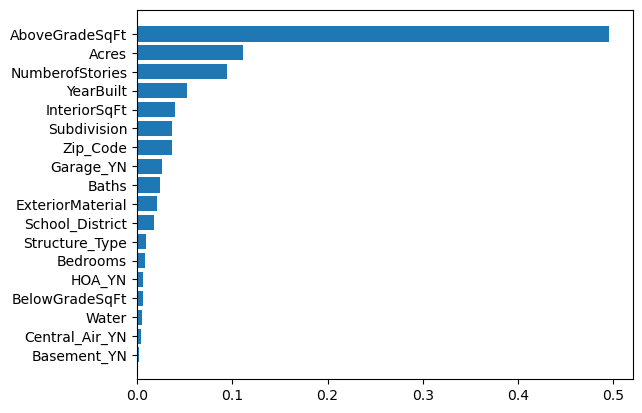

In [603]:
fig , ax = plt.subplots()
ax.barh(pf["features"] , pf["feature_importances"])
ax.invert_yaxis()

In [604]:
pf

,features,feature_importances
0,AboveGradeSqFt,0.495755
1,Acres,0.111668
2,NumberofStories,0.094258
3,YearBuilt,0.052301
4,InteriorSqFt,0.040179
5,Subdivision,0.037017
6,Zip_Code,0.036976
7,Garage_YN,0.026412
8,Baths,0.023890
9,ExteriorMaterial,0.021447


## As a result, the RandomForestRegressor Model provided a 72% accuracy when predicting Listing Price

# TESTING ML 2 : RidgeRegression

In [605]:
from sklearn import linear_model
ridge_model = linear_model.Ridge(alpha=1 ,solver='sag')
ridge_model.fit(X_train,y_train)

Ridge(alpha=1, solver='sag')

In [606]:
ridge_model.score(X_test,y_test)

0.5470330419945886

In [607]:
show_score(ridge_model)

{'Training MAE': 54234.54448027509,
 'Valid MAE': 54776.6712138502,
 'Training RMSLE': 0.22701393167799477,
 'Valid RMSLE': 0.2233302885756457,
 'Training R^2': 0.3778312783019443,
 'Valid R^2': 0.5470330419945886}

### As a result RidgeRegression performed poorly with a 53% accuracy

# Testing ML 3: LinearRegression

In [608]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [609]:
lin_reg.score(X_test,y_test)

0.5977780391427383

In [610]:
show_score(lin_reg)

{'Training MAE': 50107.73711437222,
 'Valid MAE': 50247.51694407945,
 'Training RMSLE': 0.20385248922177895,
 'Valid RMSLE': 0.20542860874220684,
 'Training R^2': 0.4312283506583967,
 'Valid R^2': 0.5977780391427383}

## The LinearRegression Model only performs at a 58 % rate

# Testing ML 4 : LASSO

In [611]:
lasso_reg  = linear_model.Lasso(alpha=1,random_state=60,selection='random',max_iter=10000)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=1, max_iter=10000, random_state=60, selection='random')

In [612]:
lasso_reg.score(X_test,y_test)

0.5977798663258096

In [613]:
show_score(lasso_reg)

{'Training MAE': 50107.653529046314,
 'Valid MAE': 50247.47905151865,
 'Training RMSLE': 0.203851626725064,
 'Valid RMSLE': 0.2054272249748278,
 'Training R^2': 0.4312283478546358,
 'Valid R^2': 0.5977798663258096}

### The LASSO perform as well in the 58% rate

# Testing ML 5 : Elastic Net

In [614]:
eNet = linear_model.ElasticNet(random_state=0  ,max_iter=10000)
eNet.fit(X_train,y_train)

C:\Users\akari\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.529e+13, tolerance: 5.181e+09
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


ElasticNet(max_iter=10000, random_state=0)

In [615]:
eNet.score(X_test,y_test)

0.5818660027234267

In [616]:
show_score(eNet)

{'Training MAE': 51343.51878851374,
 'Valid MAE': 51866.431747701004,
 'Training RMSLE': 0.21146741406449818,
 'Valid RMSLE': 0.21104379302564175,
 'Training R^2': 0.41375687834513364,
 'Valid R^2': 0.5818660027234267}

### Same as Lasso and Linear but it seem like these model works best on Scaled Data

# Testing ML 6 : BayesianRidge

In [617]:
bayesianR = linear_model.BayesianRidge()

bayesianR.fit(X_train,y_train)

BayesianRidge()

In [618]:
show_score(bayesianR)

{'Training MAE': 50101.30937751924,
 'Valid MAE': 50263.66617660255,
 'Training RMSLE': 0.2038489648815703,
 'Valid RMSLE': 0.20534557332029352,
 'Training R^2': 0.4310472902536484,
 'Valid R^2': 0.5975992390240552}